Andrew Spicciati

302 Final, Quasar Plotting

3/19/21

This file reads all the data files from QSO_S82.tar.gz into pandas tables, calculates values of average magnitude and range for each of 9258 quasars contained in the folder, and makes an interactive plot of all these quasars. It can take 3-5 minutes to run while it reads the files into pandas tables. 

My data files are kept in a different folder than astr-302-w21-project

The necessary file 'QSO_S82.tar.gz' can be found at http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#run if you still need to unpack the .tar.gz file into a file folder containing each QSO data file

#pip install patool
#import patoolib as pa
#pa.extract_archive('QSO_S82.tar.gz')

In [3]:
#Creates lists of file paths and file names 
#Will need to edit basepath to be the directory of the QSO_S82 file folder
import os

path_list = []
name_list = []

basepath = '/home/jovyan/Final Project/QSO_S82/'
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            name_list.append(entry.name)

In [4]:
#sorting by DBID
name_list = sorted(name_list, key = int)

path_list = []
for index, value in enumerate(name_list):
    path = basepath+name_list[index]
    path_list.append(path)    
path_list[0]

'/home/jovyan/Final Project/QSO_S82/70'

Light curve column information from http://faculty.washington.edu/ivezic/macleod/qso_dr7/Southern_format_LC.html

In [5]:
light_curve_columns = ['MJD_u','u','u_err',
                       'MJD_g','g','g_err',
                       'MJD_r','r','r_err',
                       'MJD_i','i','i_err',
                       'MJD_z','z','z_err',
                       'ra_median','dec_median']

In [6]:
#used for testing to lower load time of the tables 

#path_test = path_list[0:4]
#name_test = name_list[0:4]
#path_test

In [7]:
#reads all files into individual pandas tables and puts them into a list so they may be referenced

quasar_list = []

for index, value in enumerate(path_list):
    table = pd.read_csv(path_list[index], header= None, delimiter = " ", skipinitialspace=False, comment="#",names=light_curve_columns)
    quasar_list.append(table) 

In [8]:
len(quasar_list)

9258

In [9]:
#this could be done better by just making a new list of pandas tables that contains all the fixed columns, ran out of time to implement 

fixed_u_mag_list = []
fixed_g_mag_list = []
fixed_r_mag_list = []
fixed_i_mag_list = []
fixed_z_mag_list = []

for index, value in enumerate(quasar_list):
    fixed_u_mag = quasar_list[index].query("-50 < u < 40")
    fixed_u_mag_list.append(fixed_u_mag) 
    
for index, value in enumerate(quasar_list):
    fixed_g_mag = quasar_list[index].query("-50 < g < 40")
    fixed_g_mag_list.append(fixed_g_mag)
    
for index, value in enumerate(quasar_list):
    fixed_r_mag = quasar_list[index].query("-50 < r < 40")
    fixed_r_mag_list.append(fixed_r_mag)
    
for index, value in enumerate(quasar_list):
    fixed_i_mag = quasar_list[index].query("-50 < i < 40")
    fixed_i_mag_list.append(fixed_i_mag)
    
for index, value in enumerate(quasar_list):
    fixed_z_mag = quasar_list[index].query("-50 < z < 40")
    fixed_z_mag_list.append(fixed_z_mag)

In [10]:
#I decided to use the inner 80% instead, as I feel it is more representative of the range of the data and still filters outliers 

u_mag_quartile_2 = []
g_mag_quartile_2 = []
r_mag_quartile_2 = []
i_mag_quartile_2 = []
z_mag_quartile_2 = []
  
for index, value in enumerate(quasar_list):    
    mag_quartile_u = fixed_u_mag_list[index]['u'].quantile(q=.9) - fixed_u_mag_list[index]['u'].quantile(q=.1)
    u_mag_quartile_2.append(mag_quartile_u)
    
for index, value in enumerate(quasar_list):    
    mag_quartile_g = fixed_g_mag_list[index]['g'].quantile(q=.9) - fixed_g_mag_list[index]['g'].quantile(q=.1)
    g_mag_quartile_2.append(mag_quartile_g)
    
for index, value in enumerate(quasar_list):    
    mag_quartile_r = fixed_r_mag_list[index]['r'].quantile(q=.9) - fixed_r_mag_list[index]['r'].quantile(q=.1)
    r_mag_quartile_2.append(mag_quartile_r)
    
for index, value in enumerate(quasar_list):    
    mag_quartile_i = fixed_i_mag_list[index]['i'].quantile(q=.9) - fixed_i_mag_list[index]['i'].quantile(q=.1)
    i_mag_quartile_2.append(mag_quartile_i)
    
for index, value in enumerate(quasar_list):    
    mag_quartile_z = fixed_z_mag_list[index]['z'].quantile(q=.9) - fixed_z_mag_list[index]['z'].quantile(q=.1)
    z_mag_quartile_2.append(mag_quartile_z)

Here is an example of why I use the inner 80% rather than the range:

In [11]:
#Range
fixed_u_mag_list[5467]['u'].max() - fixed_u_mag_list[5467]['u'].min()

10.218

In [12]:
#inner 80%
fixed_u_mag_list[5467]['u'].quantile(q=.9) - fixed_u_mag_list[5467]['u'].quantile(q=.1) 

0.7076000000000029

In [13]:
#calculating mean in each band

u_mag_mean = []
g_mag_mean = []
r_mag_mean = []
i_mag_mean = []
z_mag_mean = []

for index, value in enumerate(quasar_list):
    avg_u = fixed_u_mag_list[index]['u'].mean()
    u_mag_mean.append(avg_u)
    
for index, value in enumerate(quasar_list):
    avg_g = fixed_g_mag_list[index]['g'].mean()
    g_mag_mean.append(avg_g)
    
for index, value in enumerate(quasar_list):
    avg_r = fixed_r_mag_list[index]['r'].mean()
    r_mag_mean.append(avg_r)
    
for index, value in enumerate(quasar_list):
    avg_i = fixed_i_mag_list[index]['i'].mean()
    i_mag_mean.append(avg_i)
    
for index, value in enumerate(quasar_list):
    avg_z = fixed_z_mag_list[index]['z'].mean()
    z_mag_mean.append(avg_z)

In [14]:
obs_count = []

for index, value in enumerate(quasar_list):
    observations = quasar_list[index]['MJD_u'].count()
    obs_count.append(observations)

In [15]:
RA = []
DEC = []

for index, value in enumerate(quasar_list):
    avRA = quasar_list[index]['ra_median'].mean()
    RA.append(avRA)
for index, value in enumerate(quasar_list):
    avDEC = quasar_list[index]['dec_median'].mean()
    DEC.append(avDEC)

In [16]:
#title for plotting purposes

name_title = []

for index, value in enumerate(quasar_list):
    title = 'QSO DBID: ' + name_list[index]
    name_title.append(title)

In [17]:
quasar_complete = (name_list,name_title,obs_count,RA,DEC,quasar_list,
                   fixed_u_mag_list,fixed_g_mag_list,fixed_r_mag_list,fixed_i_mag_list,fixed_z_mag_list,
                   u_mag_mean,g_mag_mean,r_mag_mean,i_mag_mean,z_mag_mean,
                   u_mag_quartile_2,g_mag_quartile_2,r_mag_quartile_2,i_mag_quartile_2,z_mag_quartile_2)

Quasar Complete Tuple Index List/Description:

 0 - DBID

 1 - DBID for plotting

 2 - Number of Observations

 3 - RA

 4 - DEC

 5 - Unfiltered list of quasar pandas tables (do not print in full)

 6 - Filtered U-Mag list of quasar pandas tables

 7 - Filtered G-Mag

 8 - Filtered R-Mag

 9 - Filtered I-Mag

10 - Filtered Z-Mag

11 - Filtered list of quasar mean U-mag

12 - Filtered list of quasar mean R-mag

13 - Filtered list of quasar mean G-mag

14 - Filtered list of quasar mean I-mag

15 - Filtered list of quasar mean Z-mag

16 - Filtered inner 80% of U-mag

17 - Filtered inner 80% of R-mag

18 - Filtered inner 80% of G-mag

19 - Filtered inner 80% of I-mag

20 - Filtered inner 80% of Z-mag

In [18]:
#quasar_complete[x][y] returns x=column in list y=each quasar. I.E x=0 y=0 returns quasar DBID of the first quasar in the list. 
quasar_complete[0][0]

'70'

In [19]:
quasar_dataframe = pd.DataFrame(
    {'ID': name_list,
     'obs_count': obs_count,
     'RA': RA,
     'DEC': DEC,
     'mean_u': u_mag_mean,
     'mean_g': g_mag_mean,
     'mean_r': r_mag_mean,
     'mean_i': i_mag_mean,
     'mean_z': z_mag_mean,
     'quartile_2_u': u_mag_quartile_2,
     'quartile_2_g': g_mag_quartile_2,
     'quartile_2_r': r_mag_quartile_2,
     'quartile_2_i': i_mag_quartile_2,
     'quartile_2_z': z_mag_quartile_2,
     
    }
)

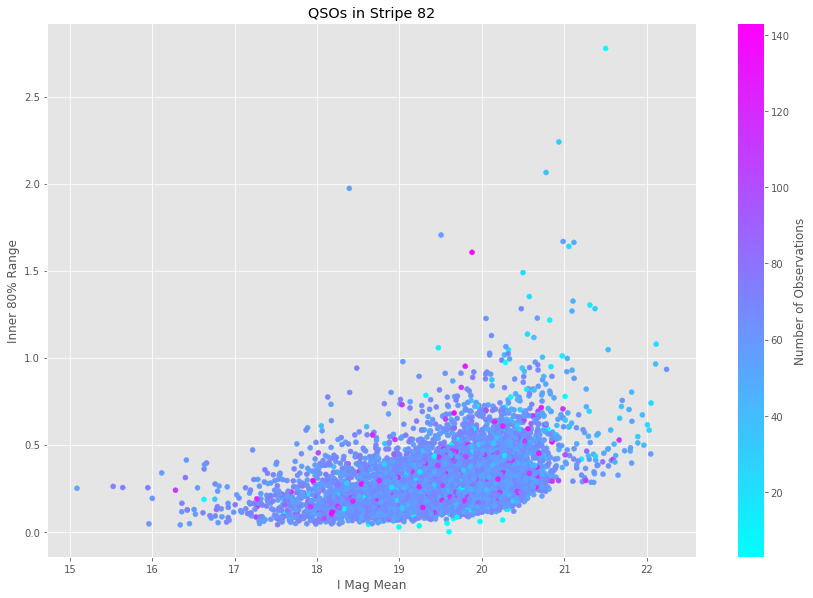

In [28]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,8)
fig.tight_layout()

ax.set_xlabel("I Mag Mean")
ax.set_ylabel("Inner 80% Range")

ax.set_title('QSOs in Stripe 82')


#ax.plot(quasar_dataframe['mean_u'],quasar_dataframe['range_u'],
#        color = "SteelBlue",
#        marker = "o",
#        linestyle = "None",
#        markersize = 1,
#        label = "All Data");

color = quasar_dataframe['obs_count']

abc = ax.scatter(quasar_dataframe['mean_i'],quasar_dataframe['quartile_2_i'],
        cmap = 'cool',
        c = color,
        s = 25,
        marker = "o",
        linestyle = "None",
        alpha=1);

cbar = plt.colorbar(abc)
cbar.set_label('Number of Observations')


In [21]:
dictionary = {
    
    'u': 6,
    'g': 7,
    'r': 8,
    'i': 9,
    'z': 10
    
}

In [22]:
def quasar_viewer(q_index,Band):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(12,8)
    fig.tight_layout()

    ax.set_xlabel("MJD")
    ax.set_ylabel(Band +" Mag")

    ax.set_title(quasar_complete[1][q_index])
    ax.scatter(quasar_complete[dictionary[Band]][q_index]['MJD_'+Band],quasar_complete[dictionary[Band]][q_index][Band],
        s = 25,
        marker = "o",
        linestyle = "None",
        alpha=1);

In [23]:
def interactive_quasar_viewer():
    interact(quasar_viewer,Band=['u','g','i','r','z'], q_index=widgets.widgets.IntText(value=0,description='Quasar Index:',disabled=False,continuous_update=False))

In [24]:
#One thing I would still like to add here is a second x axis that is time in years, but I ran out of time. It should be simple to implement.  
#It is possible to type in values, but you need to press up or down for it to update
interactive_quasar_viewer()

interactive(children=(IntText(value=0, description='Quasar Index:'), Dropdown(description='Band', options=('u'…